# 🧬 HIV Inhibition Prediction

📖 **Dataset Description**

The HIV dataset is used to predict the ability of chemical compounds to inhibit **HIV replication**. Inhibiting HIV is a crucial step in the development of antiviral drugs for treating **HIV/AIDS**.

This dataset, sourced from the **Drug Therapeutics Program (DTP)**, is widely used in benchmarking models for **high-throughput screening (HTS)** tasks. It contains binary labels indicating whether a compound is active or inactive against the HIV virus.

The task is to predict the **binary activity** of each compound — whether it inhibits HIV replication (`1`) or not (`0`) — based on its **SMILES representation**.

- **Task Type**: Binary classification  
- **Input**: SMILES string of a chemical compound  
- **Output**: `1` (active inhibitor) or `0` (inactive)  
- **Size**: 41,127 compounds

---

📚 **References**

1. AIDS Antiviral Screen Data: [DTP Dataset Link](https://wiki.nci.nih.gov/display/NCIDTPdata/AIDS+Antiviral+Screen+Data)  
2. Wu, Zhenqin, et al. “MoleculeNet: a benchmark for molecular machine learning.” *Chemical Science* 9.2 (2018): 513–530.  
3. TDC Dataset Link: [https://tdcommons.ai/single_pred_tasks/hts/#hiv](https://tdcommons.ai/single_pred_tasks/hts/#hiv)

**License**: [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)

## 📦 Imports

In [1]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import pandas as pd
from scripts.tdc_dataset_download import TDCDatasetDownloader
from scripts.eda_utils import DatasetLoader, EDAVisualizer, SMARTSPatternAnalyzer
from scripts.featurise import MolecularFeaturiser


______

## 📥 Download AMES Dataset

In [2]:
######################################## Declare category and dataset ######################################## 

category = 'hts'
dataset = 'HIV'

In [ ]:
######################################## Initiate downloader class to download the dataset ######################################## 

downloader = TDCDatasetDownloader(category, dataset)

Downloading...
100%|██████████| 2.59M/2.59M [00:02<00:00, 899kiB/s] 
Loading...
Done!


✅ Dataset 'HIV' saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIV/HIV.csv'
✅ train split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIV/splits/train.csv'
✅ valid split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIV/splits/valid.csv'
✅ test split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIV/splits/test.csv'


________

## 📊 Exploratory Data Analysis

In this section, we analyze the AMES mutagenicity dataset to better understand its structure, balance, and molecular content. Exploratory Data Analysis (EDA) helps us uncover patterns, detect anomalies, and gain insights that will guide our preprocessing and modeling steps.

### 1. Load Datasets ###

In [4]:
######################################## Initialize the dataset loader ######################################## 
loader = DatasetLoader(dataset_name=dataset)

In [5]:
######################################## Load datasets ######################################## 
main_df, train_df, valid_df, test_df = loader.load_all()

🧬 HIV_main  ➡️ (41127, 3)
⚗️ HIV_train ➡️ (28789, 3)
🔬 HIV_valid ➡️ (4113, 3)
🧪 HIV_test  ➡️ (8225, 3)


______

### 2. 📦 Dataset Overview ###

Before diving into the analysis, it’s essential to understand the structure of the datasets we’re working with — including the main dataset and the train/validation/test splits.

The function `EDAVisualizer.show_dataset_info()` provides a concise summary of:
- Shape (rows × columns)
- Column names
- Missing values
- Sample preview (via `.head()`)

You can run this by:
```python
EDAVisualizer.show_dataset_info(loader)

```
Alternatively, for specific splits only e.g for just Train and Test Data:
```python
selected_datasets = ['train','test']
EDAVisualizer.show_dataset_info(loader, dataset_names=selected_datasets)



In [6]:
######################################## Show Dataset Info  ########################################

EDAVisualizer.show_dataset_info(loader)

🧬 HIV_main Info
----------------------------------------
Shape: (41127, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Drug 0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,0
1,Drug 1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,0
2,Drug 2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,0
3,Drug 3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,0
4,Drug 4,O=S(=O)(O)CCS(=O)(=O)O,0




⚗️ HIV_train Info
----------------------------------------
Shape: (28789, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Drug 0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,0
1,Drug 2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,0
2,Drug 5,CCOP(=O)(Nc1cccc(Cl)c1)OCC,0
3,Drug 6,O=C(O)c1ccccc1O,0
4,Drug 8,O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...,0




🔬 HIV_valid Info
----------------------------------------
Shape: (4113, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Drug 7835,Cc1c2ccnc(C#N)c2c(C)c2c1[nH]c1ccccc12,0
1,Drug 35410,CN(C)c1ccc(C(Cc2ccccc2)C2NC(=S)NC2=O)cc1,0
2,Drug 34952,CC(C)=CCOc1cc(O)c2c(O)c3c(cc2c1)CC(C)(C)CC3=O,0
3,Drug 36154,O=c1onc2c3ccccc3ncn12,0
4,Drug 35825,COc1ccccc1-c1n[nH]c(-c2ccccc2O)n1,0




🧪 HIV_test Info
----------------------------------------
Shape: (8225, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Drug 24748,O=C1C(=Cc2ccc(O)cc2)N=C(c2ccccc2)N1n1c(-c2cccc...,0
1,Drug 25440,Cc1c(CCN=P(c2ccccc2)(c2ccccc2)c2ccccc2)c(=O)n2...,0
2,Drug 9889,O=C1OC(=O)C2C3CCCCC3=C3CCCCC3C12,0
3,Drug 17972,CC(=O)NC(ON1C(=O)COc2ccccc21)C(Cl)(Cl)Cl,0
4,Drug 15331,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,0


-----

### 3. 💎 Unique SMILES Analysis ###

Knowing how many unique compounds exist in each dataset helps:
- Measure diversity
- Avoid duplication bias
- Confirm splits are stratified

Run:
```python
EDAVisualizer.compare_unique_smiles(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Valid', 'Test'],
    smiles_col='Drug'  
)


In [7]:
######################################## Check Unique  Drug  Count in each dataset  ########################################
print(f"Number of Unique drug count in {dataset} train data is: =====>> {train_df["Drug"].nunique()}\n")
print(f"Number of Unique drug count in {dataset} validation data is: =====>> {valid_df["Drug"].nunique()}\n")
print(f"Number of Unique drug count in {dataset} test data is: =====>> {test_df["Drug"].nunique()}\n")
print(f"Total number of Unique drug count in {dataset} data is: =====>> {main_df["Drug"].nunique()}\n")

Number of Unique drug count in HIV train data is: =====>> 28789

Number of Unique drug count in HIV validation data is: =====>> 4113

Number of Unique drug count in HIV test data is: =====>> 8225

Total number of Unique drug count in HIV data is: =====>> 41127



Unique SMILES counts per dataset:
Train: 28789
Valid: 4113
Test: 8225


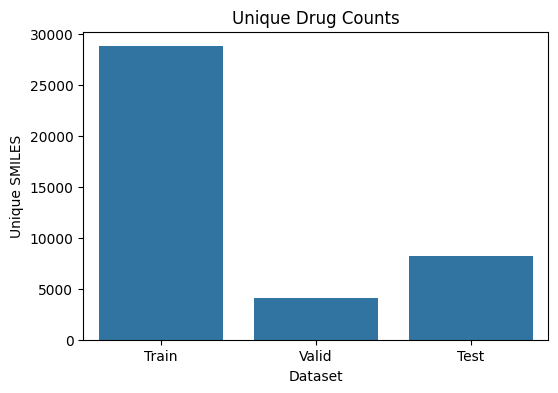

In [8]:
######################################## Compare Unique  Drug  Count Distribution  ########################################
EDAVisualizer.compare_unique_smiles(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Valid', 'Test'],
    smiles_col='Drug'  
)

_____

### 4. 🧮  Target Class Distribution in dataset ###

Class imbalance is a common challenge in classification tasks. Plotting the distribution of the target labels helps us understand:
- Whether the dataset is balanced
- The dominant class (if any)
- The need for resampling or weighted loss functions

We use:
```python
EDAVisualizer.plot_label_distribution(df)


🧮 Class Counts:
Y
0    39684
1     1443
Name: count, dtype: int64

📊 Class Percentages:
Y
0    96.49
1     3.51
Name: proportion, dtype: float64


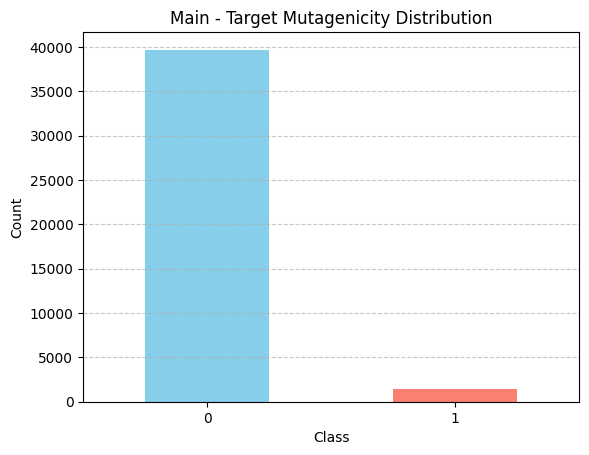

In [9]:
########################################  Plot class distribution on Main Dataset ######################################## 
EDAVisualizer.plot_label_distribution(main_df, target_col='Y', title='Main - Target Mutagenicity Distribution')

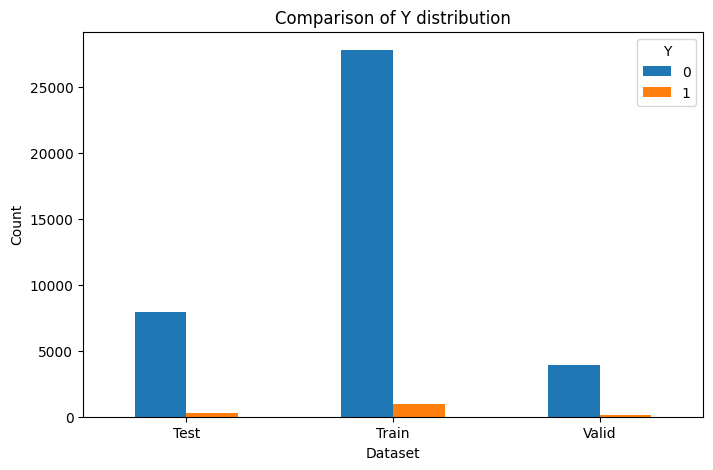


Label distribution percentages:
Y            0     1
Dataset             
Test     96.39  3.61
Train    96.56  3.44
Valid    96.18  3.82


In [10]:
########################################  Plot class distribution Comparison between Split Dataset ######################################## 
EDAVisualizer.compare_label_distributions(
    dfs=[train_df, valid_df, test_df], 
    df_names=['Train', 'Valid', 'Test'], 
    target_col='Y'
)

______

### 5. 📏 SMILES Length Analysis ###

SMILES strings vary in length depending on the molecular complexity. Analyzing their length:
- Highlights outliers or unusually long/short molecules
- Informs sequence-based model designs (like RNNs, Transformers)

To analyze the distribution:
```python
EDAVisualizer.check_smiles_length(loader=loader)


📏 SMILES Length Stats for Main:


count    41127.000000
mean        45.347071
std         23.023620
min          4.000000
25%         32.000000
50%         40.000000
75%         53.000000
max        580.000000
Name: smiles_length, dtype: float64

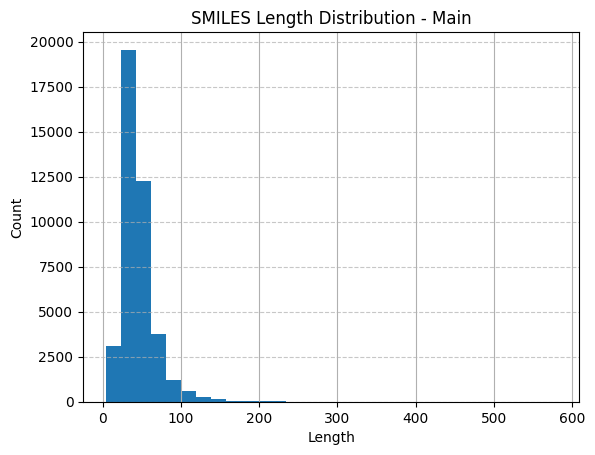

In [11]:
########################################  Check the SMILES Length Distribution of the Full Dataset ######################################## 
EDAVisualizer.check_smiles_length(loader=loader)

📏 SMILES Length Stats for Test:


count    8225.000000
mean       45.300790
std        22.226794
min         7.000000
25%        32.000000
50%        41.000000
75%        52.000000
max       383.000000
Name: smiles_length, dtype: float64

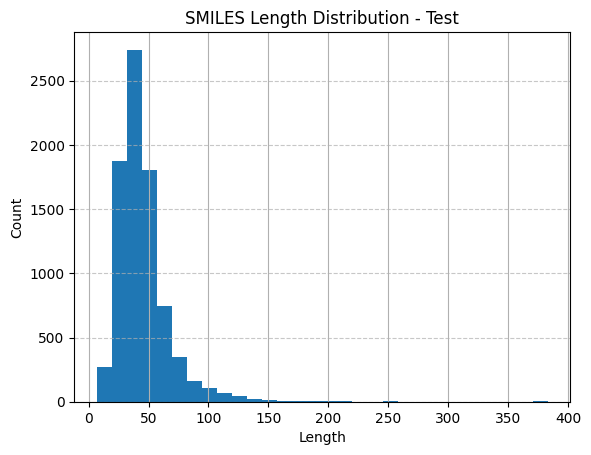

In [12]:
########################################  Alternatively, Check the SMILES Length Distribution of the Selected/Multiple Dataset Splits ######################################## 
EDAVisualizer.check_smiles_length(dfs=[test_df], names=["Test"])


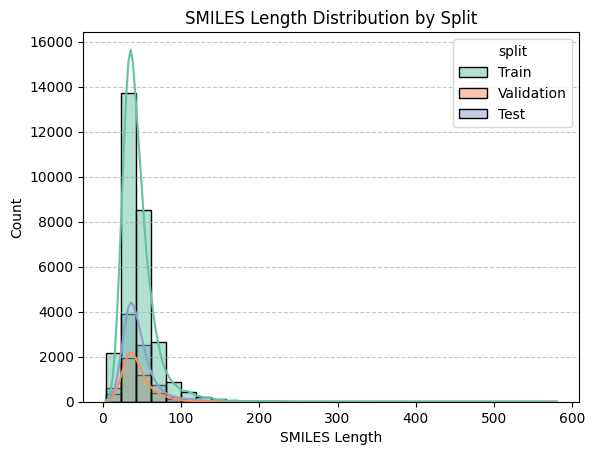

In [13]:
########################################  Compare the SMILES Length Distribution between Split Dataset ######################################## 

EDAVisualizer.compare_smiles_length(loader=loader)

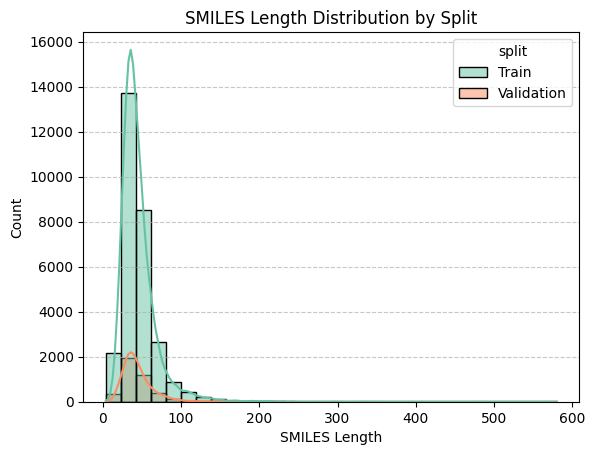

In [14]:
######################################## Alternatively, we can compare selected splits dataset by executing below ######################################## 

selected_dfs = [train_df, valid_df]
dataset_names=['Train', 'Validation']


EDAVisualizer.compare_smiles_length(selected_dfs, dataset_names)

_____________

### 5. ✔️ RDKit Molecular Validity Check ###

Not all SMILES strings are guaranteed to represent valid molecules. Some may contain syntax errors or rare patterns RDKit cannot parse.

This function evaluates validity by attempting to convert each SMILES to an RDKit Mol object:
```python
EDAVisualizer.check_molecular_validity(loader=loader)


You can also pass a different column name if your SMILES column isn’t named Drug e.g:

EDAVisualizer.check_molecular_validity(train_df, smiles_col='SMILES')

In [15]:
######################################## Check Drug Molecular Validity ######################################## 

EDAVisualizer.check_molecular_validity(loader=loader)

[13:21:19] WARNING: not removing hydrogen atom without neighbors
[13:21:19] WARNING: not removing hydrogen atom without neighbors


🧪 Validity for Main:
is_valid_mol
True    41127
Name: count, dtype: int64
❗ Invalid molecules in Main: 0.00%



[13:21:22] WARNING: not removing hydrogen atom without neighbors
[13:21:22] WARNING: not removing hydrogen atom without neighbors


🧪 Validity for Train:
is_valid_mol
True    28789
Name: count, dtype: int64
❗ Invalid molecules in Train: 0.00%

🧪 Validity for Validation:
is_valid_mol
True    4113
Name: count, dtype: int64
❗ Invalid molecules in Validation: 0.00%

🧪 Validity for Test:
is_valid_mol
True    8225
Name: count, dtype: int64
❗ Invalid molecules in Test: 0.00%



____________

### 6. 🧬 Molecular Descriptor Engineering ###
Use RDKit to calculate standard drug-likeness properties for molecules — a key step in both Exploratory Data Analysis (EDA) and featurization.

This function computes key cheminformatics descriptors from SMILES using RDKit:
- Molecular weight (MW)
- LogP (lipophilicity)
- Topological Polar Surface Area (TPSA)
- Hydrogen Bond Donors/Acceptors (HBD/HBA)
- Rotatable bonds
- Ring counts (total and aromatic)

These descriptors provide chemical insights into your dataset during EDA (e.g., distribution of molecular weights) and also serve as informative features for downstream machine learning models.

You can add descriptors to a dataset via:
```python
EDAVisualizer.add_molecular_descriptors(loader=loader)

```
You can also:

🔹 Apply to Specific DataFrames:

```python
EDAVisualizer.add_molecular_descriptors(dfs=[train_df, test_df], names=["Train", "Test"])
```

🔹 Apply to a single DataFrame:

```python
EDAVisualizer.add_molecular_descriptors(dfs=valid_df, names=["Validation"])
```

🔹 Return new DataFrames:

```python
updated = EDAVisualizer.add_molecular_descriptors(dfs=[train_df], inplace=False)

In [16]:
######################################## Add Molecular Descriptors ######################################## 
EDAVisualizer.add_molecular_descriptors(loader=loader)


🧬 Adding molecular descriptors to: Main


[13:21:50] WARNING: not removing hydrogen atom without neighbors
[13:21:50] WARNING: not removing hydrogen atom without neighbors


🧬 Adding molecular descriptors to: Train


[13:22:04] WARNING: not removing hydrogen atom without neighbors
[13:22:04] WARNING: not removing hydrogen atom without neighbors


🧬 Adding molecular descriptors to: Validation
🧬 Adding molecular descriptors to: Test


_____

### 7. ✨ SMARTS Pattern Matching ###

SMARTS patterns represent functional groups (e.g., nitro groups, amines, halogens). This module detects presence of such substructures and summarizes their occurrence by class.

**Steps**:
1. Use `SMARTSPatternAnalyzer().analyze(df)` to add SMARTS flags.
2. Use `.summarize_patterns(df)` to compare frequency by label.

Example:
```python
smarts_analyzer = SMARTSPatternAnalyzer()
train_df = smarts_analyzer.analyze(train_df)
smarts_analyzer.summarize_patterns(train_df)


In [17]:
######################################## Initialize SMARTS Pattern Analyzer ######################################## 
analyzer = SMARTSPatternAnalyzer()

In [18]:
######################################## Detect SMARTS Substructures in Main Dataset ######################################## 

data_with_flags = analyzer.analyze(main_df)

[13:22:22] WARNING: not removing hydrogen atom without neighbors
[13:22:22] WARNING: not removing hydrogen atom without neighbors
[13:22:22] WARNING: not removing hydrogen atom without neighbors
[13:22:22] WARNING: not removing hydrogen atom without neighbors
[13:22:30] WARNING: not removing hydrogen atom without neighbors
[13:22:30] WARNING: not removing hydrogen atom without neighbors
[13:22:30] WARNING: not removing hydrogen atom without neighbors
[13:22:30] WARNING: not removing hydrogen atom without neighbors
[13:22:38] WARNING: not removing hydrogen atom without neighbors
[13:22:38] WARNING: not removing hydrogen atom without neighbors
[13:22:38] WARNING: not removing hydrogen atom without neighbors
[13:22:38] WARNING: not removing hydrogen atom without neighbors
[13:22:46] WARNING: not removing hydrogen atom without neighbors
[13:22:46] WARNING: not removing hydrogen atom without neighbors
[13:22:46] WARNING: not removing hydrogen atom without neighbors
[13:22:46] WARNING: not r

✨ SMARTS Substructure Presence by Class



,Class 0,Class 1
Aromatic Ring,32033,1274
Hydroxyl Group,12540,641
Aromatic Amine,10181,460
Halogen,9979,406
Alkene,9889,345
Carboxylic Acid,2868,170
Sulfonamide,1469,92
Alkyne,321,4
Nitro Group,0,0


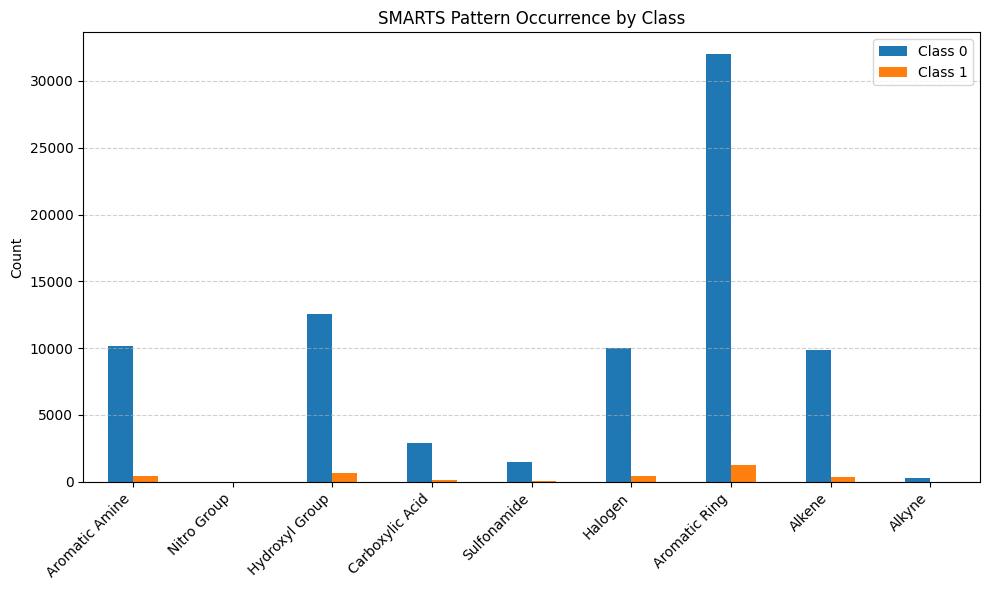

In [20]:
########################################  Analyze SMARTS Substructures ######################################## 

analyzer.summarize_patterns(data_with_flags)

__________

### 8. 📈 Visualize correlation between features  ###

### Feature Correlation Heatmaps

Correlation matrices help identify:
- Redundant features
- Feature interactions
- Potential for multicollinearity

We visualize correlations for numeric descriptors:
```python
EDAVisualizer.compare_correlation_heatmaps(
    [main_df],
    ["Data"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)
```

You can also visualize for multiple dataset by:
```python
EDAVisualizer.compare_correlation_heatmaps(
    dfs=[train_df, valid_df, test_df],
    df_names=["Train", "Validation", "Test"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings']
)


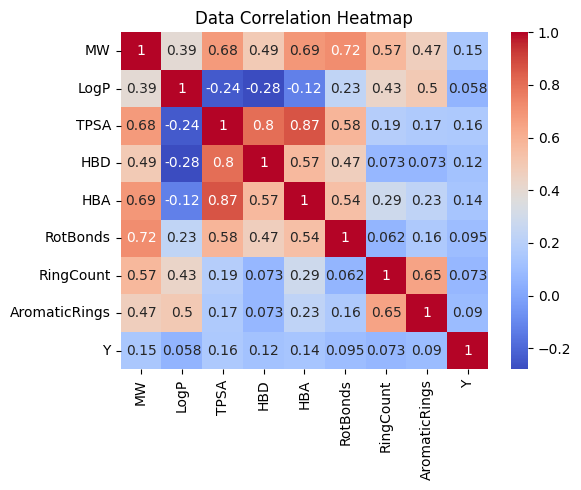

In [21]:
######################################## Show Correlation Heatmaps for Molecular Descriptors ######################################## 

EDAVisualizer.compare_correlation_heatmaps(
    [main_df],
    ["Data"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)


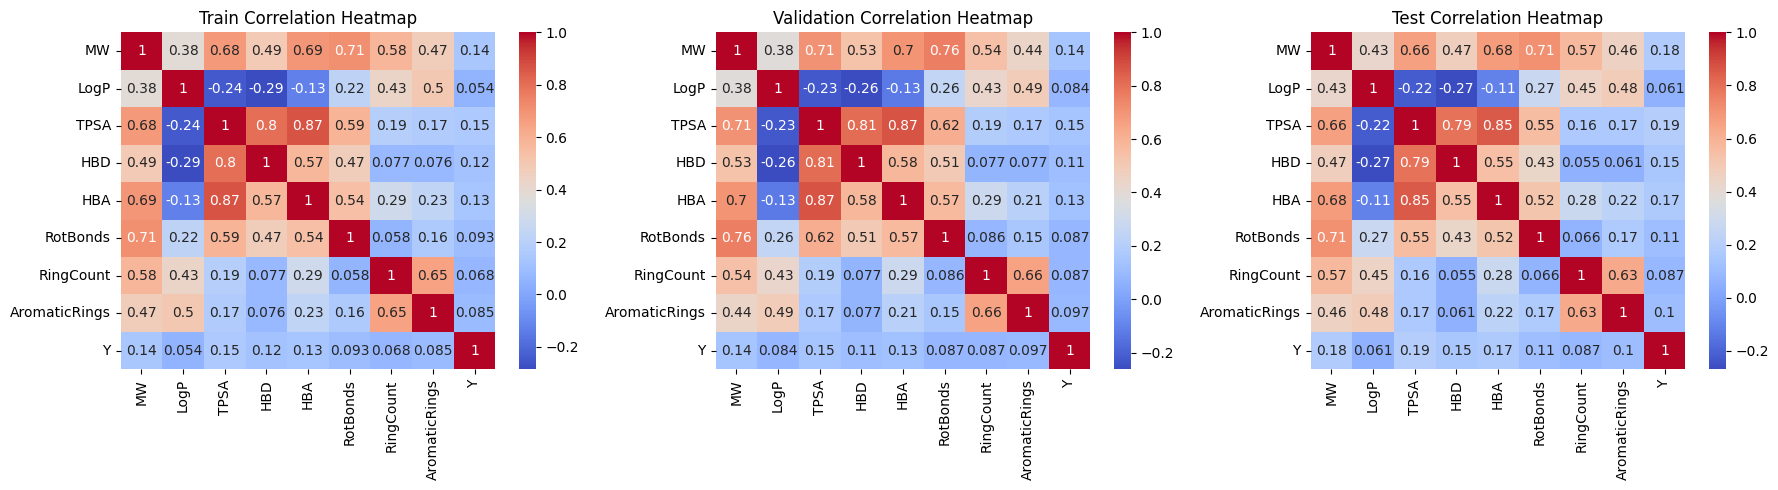

In [22]:
######################################## Check Correlation Heatmaps across Splits ######################################## 

EDAVisualizer.compare_correlation_heatmaps(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)

### Boxplot of Numeric Features Across Splits

Boxplots give another visual cue on median, spread, and outliers per descriptor.

Use:
```python
EDAVisualizer.compare_boxplots(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Validation', 'Test'],
    col='MW'
)


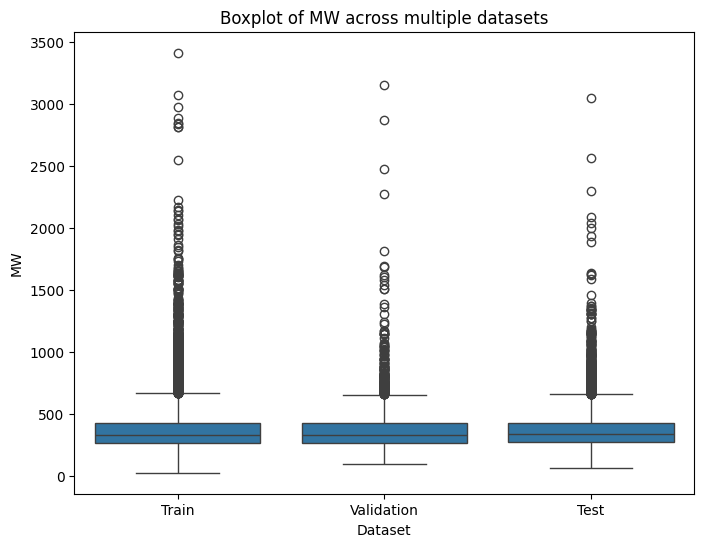

In [23]:
######################################## Compare MW Boxplots ######################################## 

EDAVisualizer.compare_boxplots(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    col='MW'
)

### Compare Feature Distributions (Histogram)

Distribution shifts between train/test datasets can impact model generalization. Here, we compare numeric descriptor histograms.

Example:
```python
EDAVisualizer.compare_numeric_distribution(
    dfs=[train_df, test_df],
    df_names=['Train', 'Test'],
    col='MW'  # or LogP, TPSA, etc.
)


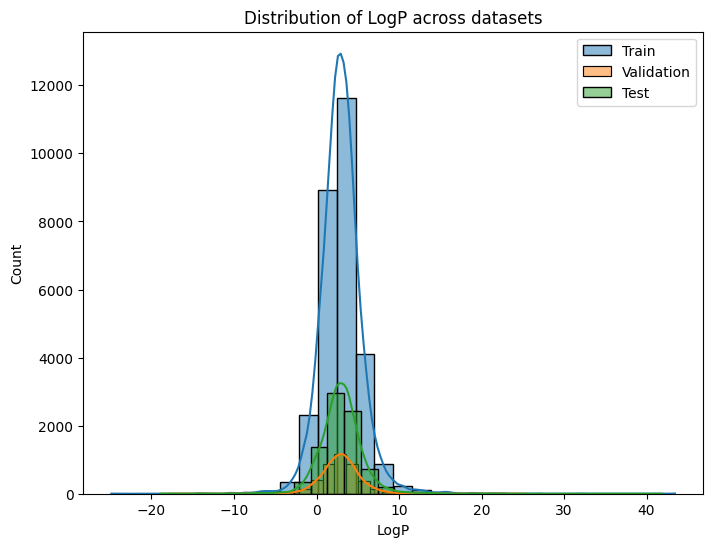

In [24]:
######################################## xxxxx ######################################## 

EDAVisualizer.compare_numeric_distribution(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    col='LogP'
)

_____________

### 9. 🔍 Visual Inspection of Molecules ###

Before building models, it’s helpful to get a “chemical feel” for the data by visualizing molecules per class.

This function:
- Randomly samples `n` molecules per class
- Converts them to RDKit molecules
- Displays them with grid labels

Usage:
```python
EDAVisualizer.draw_samples_by_class(main_df, n=4)



🧪 5 molecules for class 0


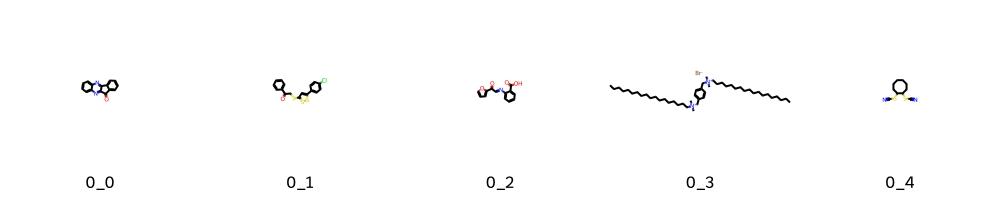

🧪 5 molecules for class 1


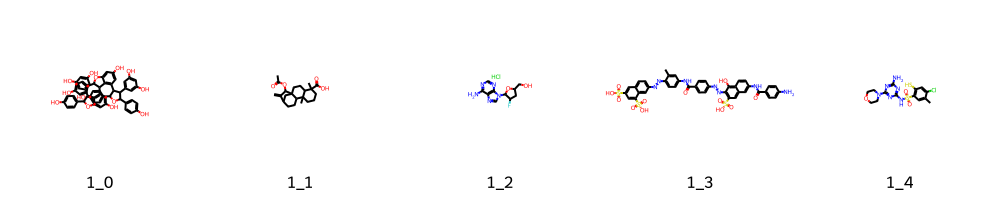

In [25]:
######################################## Visualize "n" samples of molecules per class ########################################
EDAVisualizer.draw_samples_by_class(main_df, n=5)

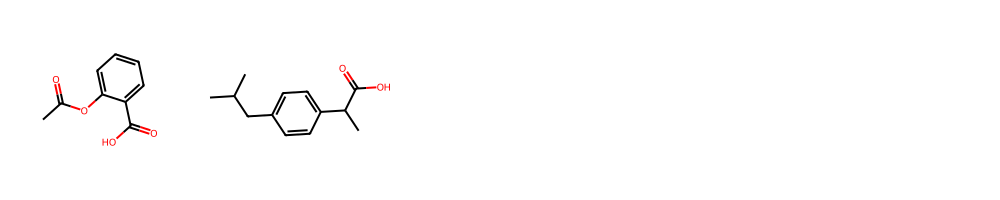

In [26]:
######################################## Draw Sample DRUG SMILE ########################################

EDAVisualizer.draw_molecules([
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # Aspirin
    "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"  # Ibuprofen
])

________

## 🧬 Molecular Featurization using Ersilia Representation Model

In this phase, each molecule in the HIV dataset is converted into a numerical vector representation using a pretrained model from the **[Ersilia Model Hub](https://www.ersilia.io/model-hub)**.

The **ErG 2D Descriptors**  representation model was used:

> The Extended Reduced Graph (ErG) approach encodes pharmacophoric properties of molecules by describing their pharmacophore nodes.  
> This model (`eos5guo`) captures the size, shape, and functional characteristics of molecules, making it particularly effective for identifying pharmacophoric patterns.  
> It was benchmarked against Daylight fingerprints and outperformed them in 10 out of 11 tasks.  
> ErG descriptors are especially useful in **scaffold hopping**, a key strategy in drug discovery.

📦 **Model:** `eos5guo`  
🔗 **Source Code:** [github.com/ersilia-os/eos5guo](https://github.com/ersilia-os/eos5guo)  
📖 **Reference Publication:** [10.1021/ci050457y](https://pubs.acs.org/doi/10.1021/ci050457y)

### How the process works:

- The `MolecularFeaturiser` class checks if the model is installed. If not, it **automatically fetches it** using the Ersilia Python SDK.
- The `MolecularFeaturiser` can also be initiated using CLI by setting `use_python_api=False`
- Additionally, by setting `auto_serve=True`, the class tries serving using Python SDK first; but if it fails, switches to CLI mode and logs both events and confirms when initialization is successful.
- It then applies the model to the `train`, `val`, and `test` splits of the AMES dataset.
- This will featurize the train, validation, and test splits.
- Each SMILES string is transformed into a high-dimensional vector representation.
- The output is stored as new CSV files (e.g., `train_eos5axz_features.csv`) inside `data/HIV/splits/`.
- Then the featurization can be executed and preview the results.


In [3]:
######################################## Initialize featurizer ########################################
featuriser = MolecularFeaturiser(dataset_name=dataset, model_id="eos5guo")

2025-04-02 13:35:00,646 - INFO - [API] Initializing Ersilia model: eos5guo


In [4]:
######################################## Run featurization across all dataset splits ######################################## 

featuriser.featurise_all_splits()

2025-04-02 13:35:33,639 - INFO - [+] Featurizing /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIV/splits/train.csv -> /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIV/splits/train_eos5guo_features.csv
2025-04-02 13:36:41,392 - INFO - Deleted temporary file: /var/folders/5g/d1fz9jw119x57smh9smql2m00000gn/T/tmpgn7alqz2.csv
2025-04-02 13:36:41,395 - INFO - Deleted temporary file: /var/folders/5g/d1fz9jw119x57smh9smql2m00000gn/T/tmpgn7alqz2_output.csv
2025-04-02 13:36:41,423 - INFO - Attempting to merge labels from /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIV/HIV.csv
2025-04-02 13:36:41,459 - WARNING - Could not merge labels: 'input'
2025-04-02 13:36:44,013 - INFO - Featurization completed in 70.37 seconds for train split.
2025-04-02 13:36:44,014 - INFO - [+] Featurizing /Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIV/splits/valid.csv -> /Users/taiwoadelakin/Documents/Doc/Pr

In [5]:
######################################## Load and preview featurized dataset among splits ######################################## 

split_paths = {
    split: featuriser.get_featurized_path(split)
    for split in ["train", "valid", "test"]
}

In [6]:
######################################## Read featurized Split Datasets ######################################## 

df_feat_train = pd.read_csv(split_paths["train"])
df_feat_valid   = pd.read_csv(split_paths["valid"])
df_feat_test  = pd.read_csv(split_paths["test"])

In [7]:
######################################## Print Shape of Featurized Splits ######################################## 

print("Featurized Train shape:", df_feat_train.shape)
print("Featurized Validation shape:", df_feat_valid.shape)
print("Featurized Test shape:", df_feat_test.shape)


Featurized Train shape: (28789, 318)
Featurized Validation shape: (4113, 318)
Featurized Test shape: (8225, 318)


_________